MPS

In [2]:
%config InlineBackend.figure_formats = ['svg']
import quimb as qu
import quimb.tensor as qtn

p = qtn.MPS_rand_state(L=20, bond_dim=50)
print(f"Site tags: '{p.site_tag_id}', site inds: '{p.site_ind_id}'")
p.show()

Site tags: 'I{}', site inds: 'k{}'
 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 
●──●──●──●──●──●──●──●──●──●──●──●──●──●──●──●──●──●──●──●
│  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │


In [22]:
p.arrays

(array([[-0.3716526 ,  0.79661919],
        [ 0.28933316,  0.62319703],
        [ 0.37034629,  0.36917843]]),
 array([[[-0.58481063,  0.12598885],
         [ 0.441635  , -0.33208554],
         [ 0.82647513,  0.65125471]],
 
        [[ 0.14796741,  0.80302297],
         [-0.61636493,  0.34599384],
         [-0.63008801, -0.12105691]],
 
        [[ 0.03834662,  0.6357019 ],
         [-0.69550181,  0.32016242],
         [-0.88561251, -0.56732093]]]),
 array([[[-0.67220091,  0.19696513],
         [ 0.04144818,  0.11230074],
         [-0.37210758, -0.39967301]],
 
        [[ 0.20308761, -0.74857987],
         [ 0.31142049,  0.49918331],
         [-0.71902099,  0.63769015]],
 
        [[-0.55853541, -0.09917687],
         [-0.31083395,  0.12191161],
         [-0.43915211,  0.76607086]]]),
 array([[[ 0.21117699, -0.08761127],
         [-0.25858571,  0.61550816],
         [-0.73234186,  0.07490814]],
 
        [[ 0.15605099,  1.05543946],
         [ 1.07369236,  0.86476049],
         [-0.58864

In [34]:
p.right_canonize()
p.show()

 50 50 50 50 50 50 50 50 50 50 50 50 50 50 32 16 8 4 2 
●──<──<──<──<──<──<──<──<──<──<──<──<──<──<──<──<─<─<─<
│  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │  │ │ │ │


In [37]:
p[10].data

array([[[-0.03983789, -0.13143825],
        [-0.04803853, -0.06604132],
        [-0.02659957,  0.07624417],
        ...,
        [-0.03930365, -0.11690009],
        [-0.01077882,  0.03263343],
        [ 0.02296419, -0.02002284]],

       [[-0.23995838,  0.05742398],
        [ 0.16092601, -0.13342137],
        [ 0.03099065,  0.02757446],
        ...,
        [-0.03044675,  0.02902961],
        [-0.09139617, -0.00642591],
        [-0.08062742,  0.06187052]],

       [[ 0.17425145,  0.06024293],
        [ 0.01550456,  0.00307008],
        [ 0.06708511,  0.21197255],
        ...,
        [-0.05018839,  0.01274323],
        [-0.02518803,  0.08671567],
        [ 0.01864763,  0.03603631]],

       ...,

       [[-0.05068748,  0.01024799],
        [ 0.02953359, -0.02281352],
        [-0.01021368, -0.11268128],
        ...,
        [-0.11093784, -0.01046491],
        [-0.02854865, -0.03413012],
        [ 0.07380155, -0.04151206]],

       [[ 0.28198209, -0.12537984],
        [ 0.01042245,  0.09

In [13]:
p.H @ p

1.0000000000000002

In [51]:
builder = qtn.SpinHam1D(S=1)
builder += 1/2, '+', '-'
builder += 1/2, '-', '+'
builder += 1, 'Z', 'Z'
H = builder.build_mpo(L=100)
#H.arrays

In [52]:
dmrg = qtn.DMRG2(H, bond_dims=[10, 20, 100, 100, 200], cutoffs=1e-10)


In [53]:
dmrg.solve(tol=1e-6, verbosity=1)

1, R, max_bond=(10/10), cutoff:1e-10


100%|##########################################| 99/99 [00:00<00:00, 224.00it/s]

Energy: -138.68817185193177 ... not converged.
2, R, max_bond=(10/20), cutoff:1e-10



100%|##########################################| 99/99 [00:00<00:00, 217.06it/s]

Energy: -138.93661272860075 ... not converged.
3, R, max_bond=(20/100), cutoff:1e-10



100%|###########################################| 99/99 [00:20<00:00,  4.84it/s]

Energy: -138.94004791540178 ... not converged.
4, R, max_bond=(57/100), cutoff:1e-10



100%|###########################################| 99/99 [00:18<00:00,  5.36it/s]

Energy: -138.94008551634187 ... not converged.
5, R, max_bond=(91/200), cutoff:1e-10



100%|###########################################| 99/99 [00:19<00:00,  5.11it/s]

Energy: -138.94008604169505 ... converged!


True

In [62]:
dmrg.state.arrays[1].shape


builder = qtn.SpinHam1D(S=1 / 2)
builder.add_term(1.0, 'Z', 'Z')
builder.add_term(0.9, 'Y', 'Y')
builder.add_term(0.8, 'X', 'X')
builder.add_term(0.6, 'Z')

H = qtn.ham_1d_heis(20, bz=0.1)

# check the two site term
H.terms[0, 1]
psi0 = qtn.MPS_neel_state(20)

In [67]:
psi0.arrays

(array([[1., 0.]]),
 array([[[0., 1.]]]),
 array([[[1., 0.]]]),
 array([[[0., 1.]]]),
 array([[[1., 0.]]]),
 array([[[0., 1.]]]),
 array([[[1., 0.]]]),
 array([[[0., 1.]]]),
 array([[[1., 0.]]]),
 array([[[0., 1.]]]),
 array([[[1., 0.]]]),
 array([[[0., 1.]]]),
 array([[[1., 0.]]]),
 array([[[0., 1.]]]),
 array([[[1., 0.]]]),
 array([[[0., 1.]]]),
 array([[[1., 0.]]]),
 array([[[0., 1.]]]),
 array([[[1., 0.]]]),
 array([[0., 1.]]))

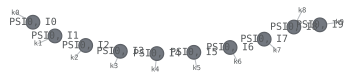

inicial
(array([[1., 0.]]), array([[[1., 0.]]]), array([[[1., 0.]]]), array([[[1., 0.]]]), array([[[1., 0.]]]), array([[[1., 0.]]]), array([[[1., 0.]]]), array([[[1., 0.]]]), array([[[1., 0.]]]), array([[1., 0.]]))
final
(array([[1., 0.]]), array([[[1., 0.]]]), array([[[1., 0.]]]), array([[[1., 0.]]]), array([[[1., 0.]]]), array([[[1., 0.]]]), array([[[1., 0.]]]), array([[[1., 0.]]]), array([[[1., 0.]]]), array([[1., 0.]]), array([[ 0.70710678+0.j,  0.70710678+0.j],
       [ 0.70710678+0.j, -0.70710678+0.j]]), array([[ 0.70710678+0.j,  0.70710678+0.j],
       [ 0.70710678+0.j, -0.70710678+0.j]]), array([[ 0.70710678+0.j,  0.70710678+0.j],
       [ 0.70710678+0.j, -0.70710678+0.j]]), array([[ 0.70710678+0.j,  0.70710678+0.j],
       [ 0.70710678+0.j, -0.70710678+0.j]]), array([[ 0.70710678+0.j,  0.70710678+0.j],
       [ 0.70710678+0.j, -0.70710678+0.j]]), array([[ 0.70710678+0.j,  0.70710678+0.j],
       [ 0.70710678+0.j, -0.70710678+0.j]]), array([[ 0.70710678+0.j,  0.70710678+0.j],
 

In [18]:
import quimb as qu

# some operators to apply
H = qu.hadamard()
CNOT = qu.controlled('not')

# setup an intitial register of qubits
n = 10
psi0 = qtn.MPS_computational_state('0' * n, tags='PSI0')
psi0.draw()
print('inicial')
print(psi0.arrays)
# apply hadamard to each site
for i in range(n):
    psi0.gate_(H, i, tags='H')

# apply CNOT to even pairs
for i in range(0, n, 2):
    psi0.gate_(CNOT, (i, i + 1), tags='CNOT')

# apply CNOT to odd pairs
for i in range(1, n - 1, 2):
    psi0.gate_(CNOT, (i, i + 1), tags='CNOT')

print('final')
print(psi0.arrays)

In [14]:
statevector=psi0.to_dense()
statevector.data[0]


NotImplementedError: memoryview: unsupported format Zd

In [17]:
import quimb.tensor as qtn
import numpy as np

# Crear un estado MPS de ejemplo
n = 4
psi0 = qtn.MPS_computational_state('0101' * (n // 4), tags='psi0')
print(psi0.arrays)
# Convertir el MPS a un tensor denso
dense_tensor = psi0.to_dense()

# Aplanar el tensor a un vector de estado
statevector = np.reshape(dense_tensor, -1)

# Imprimir el statevector
print(statevector)

(array([[1., 0.]]), array([[[0., 1.]]]), array([[[1., 0.]]]), array([[0., 1.]]))
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [19]:
n = 10
psi0 = qtn.MPS_computational_state('0' * n)

for i in range(n):
    # 'swap+split' will be ignore to one-site gates
    psi0.gate_(H, i, contract='swap+split')

# use Z-phase to create entanglement
Rz = qu.phase_gate(0.42)
for i in range(n):
    psi0.gate_(Rz, i, contract='swap+split')

for i in range(0, n, 2):
    psi0.gate_(CNOT, (i, i + 1), contract='swap+split')

for i in range(1, n - 1, 2):
    psi0.gate_(CNOT, (i, i + 1), contract='swap+split')

# act with one long-range CNOT
psi0.gate_(CNOT, (2, n - 2), contract='swap+split')

MatrixProductState(tensors=10, indices=19, L=10, max_bond=4)

In [25]:
peps = qtn.PEPS.rand(Lx=5, Ly=5, bond_dim=3, seed=666)
peps.show()


    3    3    3    3   
 ●━━━━●━━━━●━━━━●━━━━●
╱┃3  ╱┃3  ╱┃3  ╱┃3  ╱┃3  
 ┃  3 ┃  3 ┃  3 ┃  3 ┃ 
 ●━━━━●━━━━●━━━━●━━━━●
╱┃3  ╱┃3  ╱┃3  ╱┃3  ╱┃3  
 ┃  3 ┃  3 ┃  3 ┃  3 ┃ 
 ●━━━━●━━━━●━━━━●━━━━●
╱┃3  ╱┃3  ╱┃3  ╱┃3  ╱┃3  
 ┃  3 ┃  3 ┃  3 ┃  3 ┃ 
 ●━━━━●━━━━●━━━━●━━━━●
╱┃3  ╱┃3  ╱┃3  ╱┃3  ╱┃3  
 ┃  3 ┃  3 ┃  3 ┃  3 ┃ 
 ●━━━━●━━━━●━━━━●━━━━●
╱    ╱    ╱    ╱    ╱    


In [27]:
norm.contract(all, optimize='auto-hq')

/home/sergio/.local/lib/python3.10/site-packages/cotengra/hyperoptimizers/hyper.py:54: UserWarning: Couldn't find `optuna`, `baytune (btb)`, `chocolate`, `nevergrad` or `skopt` so will use completely random sampling in place of hyper-optimization.
  warnings.warn(


0.5077521135992213

In [29]:
%%time
norm.contract_boundary(max_bond=32)

CPU times: user 33.2 s, sys: 10.1 s, total: 43.3 s
Wall time: 2.68 s


0.5069991787005167

In [34]:
D = 4
psi0 = qtn.PEPS.rand(4, 4, bond_dim=D, seed=666)

ham = qtn.LocalHam2D(4, 4, H2=qu.ham_heis(2))

In [35]:
su = qtn.SimpleUpdate(
    psi0, 
    ham,
    chi=32,  # boundary contraction bond dim for computing energy
    compute_energy_every=10,
    compute_energy_per_site=True,
    keep_best=True,
)

In [36]:
for tau in [0.3, 0.1, 0.03, 0.01]:
    su.evolve(100, tau=tau)

n=400, tau=0.0100, energy~-0.562848: 100%|##########| 100/100 [01:24<00:00,  1.19it/s]


In [37]:
# use the best SU state as the starting point for FU
psi0 = su.best['state'].copy()

In [38]:
def to_backend(x):
    import cupy as cp
    return cp.asarray(x).astype('float32')

psi0.apply_to_arrays(to_backend)
ham.apply_to_arrays(to_backend)

ModuleNotFoundError: No module named 'cupy'

In [42]:
%config InlineBackend.figure_formats = ['svg']

import random
import quimb as qu
import quimb.tensor as qtn

N = 80
circ = qtn.Circuit(N)

# randomly permute the order of qubits
regs = list(range(N))
random.shuffle(regs)

# hamadard on one of the qubits
circ.apply_gate('H', regs[0])

# chain of cnots to generate GHZ-state
for i in range(N - 1):
    circ.apply_gate('CNOT', regs[i], regs[i + 1])

# apply multi-controlled NOT
circ.apply_gate('X', regs[-1], controls=regs[:-1])

# sample it a few times
for b in circ.sample(3):
    print(b)

11111111111111111111111111111111111111111111111111111110111111111111111111111111
11111111111111111111111111111111111111111111111111111110111111111111111111111111
00000000000000000000000000000000000000000000000000000000000000000000000000000000


In [45]:
import cupy as cp

# Crear arrays en la GPU
a = cp.array([1, 2, 3, 4, 5])
b = cp.array([5, 4, 3, 2, 1])

# Realizar operaciones en la GPU
c = a + b

print(c)  # Salida: [6 6 6 6 6]

RuntimeError: CuPy failed to load libnvrtc.so.12: OSError: libnvrtc.so.12: cannot open shared object file: No such file or directory